# PPN Dynamic Filtering

In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1337)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Merge, ThresholdedReLU
from keras.layers import Convolution2D, MaxPooling2D, InputLayer
from keras.regularizers import activity_l2
from keras.utils import np_utils
from keras.callbacks import Callback
from keras import backend as K

from ppap.layers import PPDFN, DFN
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# Modified version of keras/examples/mnist_cnn.py

batch_size = 100
nb_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
# pool_size = (2, 2)
# convolution kernel size
# kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Explicitly set dim ordering to theano
K.set_image_dim_ordering('th')

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [19]:
# Works on fixed batch size as of now
modelPP = Sequential()
modelPP.add(InputLayer(batch_input_shape=(batch_size, 1, img_rows, img_cols)))
modelPP.add(PPDFN(5))
modelPP.add(Activation('relu'))
modelPP.add(Flatten())
modelPP.add(Dense(nb_classes))
modelPP.add(Activation('softmax'))

# Works on fixed batch size as of now
model = Sequential()
model.add(InputLayer(batch_input_shape=(batch_size, 1, img_rows, img_cols)))
model.add(DFN(5))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [20]:
modelPP.summary()
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (100, 1, 28, 28)      0                                            
____________________________________________________________________________________________________
ppdfn_3 (PPDFN)                  (100, 1, 28, 28)      1110        input_5[0][0]                    
____________________________________________________________________________________________________
activation_9 (Activation)        (100, 1, 28, 28)      0           ppdfn_3[0][0]                    
____________________________________________________________________________________________________
flatten_5 (Flatten)              (100, 784)            0           activation_9[0][0]               
___________________________________________________________________________________________

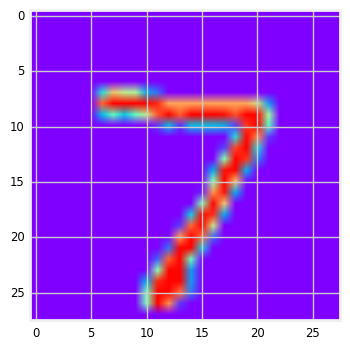

In [21]:
test_index = 0
plt.imshow(X_test[test_index, 0])

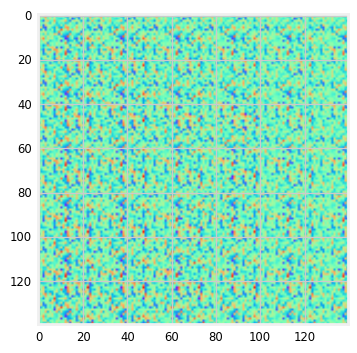

In [22]:
fs = get_filter(modelPP, X_test[:batch_size])
plt.imshow(filters_image(fs[test_index]))

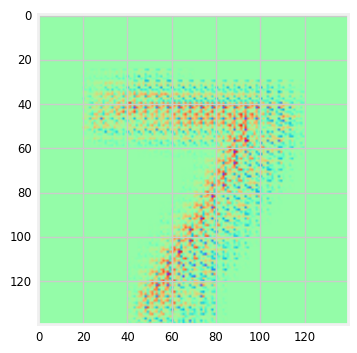

In [23]:
fs = get_filter(model, X_test[:batch_size])
plt.imshow(filters_image(fs[test_index]))

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
        
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 97s - loss: 0.4305 - acc: 0.8719 - val_loss: 0.2684 - val_acc: 0.9209
Epoch 2/10
60000/60000 [==============================] - 104s - loss: 0.2525 - acc: 0.9263 - val_loss: 0.2176 - val_acc: 0.9360
Epoch 3/10
60000/60000 [==============================] - 105s - loss: 0.2082 - acc: 0.9396 - val_loss: 0.1935 - val_acc: 0.9448
Epoch 4/10
60000/60000 [==============================] - 96s - loss: 0.1797 - acc: 0.9474 - val_loss: 0.1670 - val_acc: 0.9528
Epoch 5/10
60000/60000 [==============================] - 96s - loss: 0.1614 - acc: 0.9525 - val_loss: 0.1557 - val_acc: 0.9558
Epoch 6/10
60000/60000 [==============================] - 103s - loss: 0.1481 - acc: 0.9564 - val_loss: 0.1436 - val_acc: 0.9592
Epoch 7/10
60000/60000 [==============================] - 95s - loss: 0.1366 - acc: 0.9592 - val_loss: 0.1441 - val_acc: 0.9602
Epoch 8/10
60000/60000 [===========================

In [25]:
modelPP.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
        
modelPP.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 92s - loss: 0.4110 - acc: 0.8771 - val_loss: 0.2341 - val_acc: 0.9326
Epoch 2/10
60000/60000 [==============================] - 92s - loss: 0.1813 - acc: 0.9478 - val_loss: 0.1382 - val_acc: 0.9593
Epoch 3/10
60000/60000 [==============================] - 93s - loss: 0.1296 - acc: 0.9630 - val_loss: 0.1080 - val_acc: 0.9692
Epoch 4/10
60000/60000 [==============================] - 95s - loss: 0.1024 - acc: 0.9705 - val_loss: 0.0892 - val_acc: 0.9719
Epoch 5/10
60000/60000 [==============================] - 94s - loss: 0.0867 - acc: 0.9751 - val_loss: 0.0795 - val_acc: 0.9748
Epoch 6/10
60000/60000 [==============================] - 95s - loss: 0.0768 - acc: 0.9771 - val_loss: 0.0786 - val_acc: 0.9768
Epoch 7/10
60000/60000 [==============================] - 95s - loss: 0.0692 - acc: 0.9793 - val_loss: 0.0723 - val_acc: 0.9775
Epoch 8/10
60000/60000 [==============================

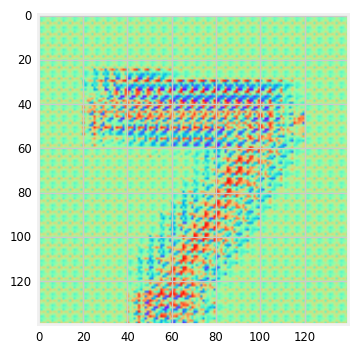

In [26]:
fs = get_filter(model, X_test[:batch_size])
plt.imshow(filters_image(fs[test_index]))

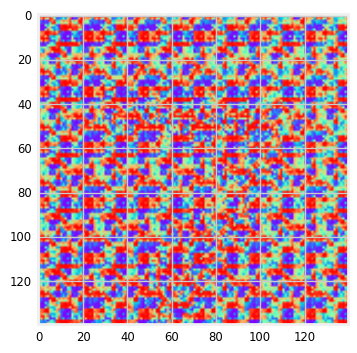

In [27]:
fs = get_filter(modelPP, X_test[:batch_size])
plt.imshow(filters_image(fs[test_index]))